#  <font color='cyan' style='font-size: 66px;'> **Robot Trading**</font>

## <font color='deepskyblue' style='font-size: 33px;'>  1 - Configurar el Ambiente</font>

---

### <font color='darkgrey' style='font-size: 33px;'> 1.1 Configurando el Ambiente</font>

- Definir las variables Globales



1.   global     
2.   precio_actual
3.   tendencia
4.   media_bitcoin
5.   algoritmo_decision
6.   df_bitcoin


### <font color='darkgrey' style='font-size: 33px;'> 1.2 Importando librerias</font>

In [ ]:

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import yfinance as yf                                 #Datos

import requests
from bs4 import BeautifulSoup                         #Webscraping

#from IPython.display import clear_output              # Borrar salida y solo ver la ultima
import time



### <font color='darkgrey' style='font-size: 33px;'> 1.3 Comprobacion de las Librerias</font>

In [ ]:

!python -V
print('---')
!pip show Pandas | grep 'Name\|Version'               # El comando grep filtra solo el nombre\version
print('---')
!pip show Numpy | grep 'Name\|Version'
print('---')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
---
Name: pandas
Version: 1.5.3
---
Name: numpy
Version: 1.23.5
---
Name: matplotlib
Version: 3.7.1


## <font color='deepskyblue' style='font-size: 33px;'>  2 - Obtencion de Datos</font>

---

- Utilizaremos la biblioteca yfinance de Phyton, para extraer el historico de precios del Bitcoin en dolares BTC-USD

- Extraeremos el historico de 7 dias en intervalos de 5 min

- Se guardara en el dataframe df_bitcoin

### <font color='darkgrey' style='font-size: 33px;'> 2.1 Importar la base historica del Bitcoin</font>

In [ ]:

# Crear la función importar_base_bitcoin()

def importar_base_bitcoin():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  btcnUsd = yf.Ticker("BTC-USD")
  df_bitcoin = btcnUsd.history(period="7d", interval = "5m")

importar_base_bitcoin()
df_bitcoin



,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-10-15 00:00:00+00:00,26858.011719,26859.375000,26852.537109,26852.537109,0,0.0,0.0
2023-10-15 00:05:00+00:00,26846.734375,26849.812500,26846.007812,26849.812500,0,0.0,0.0
2023-10-15 00:10:00+00:00,26852.900391,26852.900391,26846.332031,26846.332031,0,0.0,0.0
2023-10-15 00:15:00+00:00,26846.289062,26849.716797,26846.289062,26849.716797,0,0.0,0.0
2023-10-15 00:20:00+00:00,26843.685547,26849.593750,26842.390625,26842.390625,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-21 19:10:00+00:00,30148.220703,30148.220703,30116.154297,30116.154297,32430080,0.0,0.0
2023-10-21 19:15:00+00:00,30100.392578,30119.751953,30093.759766,30105.693359,36553728,0.0,0.0
2023-10-21 19:20:00+00:00,30104.060547,30106.347656,30072.722656,30072.722656,8903680,0.0,0.0


In [ ]:
df_bitcoin.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1962.000000,1962.000000,1962.000000,1962.000000,1.962000e+03,1962.0,1962.0
mean,28445.742612,28458.840841,28434.158663,28447.087240,2.633621e+07,0.0,0.0
std,888.760441,891.270393,885.965982,888.424147,8.651184e+07,0.0,0.0
min,26825.671875,26829.638672,26817.894531,26823.027344,0.000000e+00,0.0,0.0
25%,28166.769043,28186.088867,28150.687988,28165.674805,0.000000e+00,0.0,0.0
50%,28424.746094,28440.694336,28413.356445,28424.317383,2.441216e+06,0.0,0.0
75%,28941.108887,29010.788574,28919.156738,28969.237305,2.351386e+07,0.0,0.0
max,30215.724609,30287.482422,30215.724609,30218.609375,2.050228e+09,0.0,0.0


La función de Python, llamada importar_base_bitcoin(), realiza lo siguiente:

- Importa las variables globales df_bitcoin, precio_actual, tendencia, media_bitcoin y algoritmo_decision para que puedan ser utilizadas y modificadas dentro de la función.

- Utiliza la biblioteca yfinance, importada previamente para obtener datos históricos de precios de Bitcoin en relación con el dólar estadounidense (BTC-USD). Estos datos se almacenan en el DataFrame de Pandas llamado df_bitcoin.

- La función se utiliza para obtener datos históricos de precios de Bitcoin durante los últimos 7 días con un intervalo de 5 minutos. Estos datos se almacenan en el DataFrame df_bitcoin.

- No retorna ningún valor explícito, pero los datos históricos de Bitcoin quedan disponibles en el DataFrame df_bitcoin.

- Después de llamar a la función importar_base_bitcoin(), se puede acceder a los datos históricos de Bitcoin ejecutando df_bitcoin. Estos datos estarán disponibles para su posterior procesamiento o análisis.



## <font color='deepskyblue' style='font-size: 33px;'>  3 - WebScraping


1.   Calculo del Precio Actual del Bitcoin
2.   Calculo de la Tendencia del Bitcoin


</font>

---

 - Utilizando la biblioteca BeautifulSoup realizamos el Web Scraping de la página https://coinmarketcap.com/ para extraer el precio actual del Bitcoin BTC en dólares USD y la variación de su precio en la última hora 1h . El precio debe convertirse a "float" y guardarse en la variable llamada "precio_actual". La variable "tendencia" guarda el valor de 'baja', si la variación del precio es negativa, sino, guarda el valor de 'alta'.

### <font color='darkgrey' style='font-size: 33px;'> 3.1 WebScraping extrayendo los datos</font>

- Para eliminar los caracteres no numéricos (como "$" y ",") y devolver el valor como un número decimal (por ejemplo, 27071.70).

In [ ]:
def limpiar_precio(raw):
  return float(raw.replace("$", "").replace(",",""))

sc-a0353bbc-0 gDrtaY, sc-a0353bbc-0 gDrtaY fall, sc-a0353bbc-0 gDrtaY rise

In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}
url = 'https://coinmarketcap.com'
respuesta = requests.get(url, headers=headers)
s = BeautifulSoup(respuesta.content, features='lxml')
respuesta = s.findAll('p', {'class':'sc-4984dd93-0 kKpPOn coin-item-symbol'})


In [ ]:
indice=0
for item in respuesta:
  if item.getText()=='BTC':
    break
  indice+=1
print('La posición actual del bitcoin en la tabla es: ', indice)

La posición actual del bitcoin en la tabla es:  0


In [ ]:
respuesta = s.findAll('div', {'class':['sc-a0353bbc-0 gDrtaY', 'sc-a0353bbc-0 gDrtaY fall', 'sc-a0353bbc-0 gDrtaY rise']})
precio_actual=float(respuesta[indice].getText().replace('$','').replace(',',''))
print('El precio actual del bitcoin es: ', precio_actual)

El precio actual del bitcoin es:  30080.16


In [ ]:
lista = []
respuesta = s.findAll('span', {'class':['sc-d55c02b-0 gUnzUB']})
for item in respuesta[::3]:
  lista.append(item)
  print(item)


<span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>0.21%</span>
<span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>0.01%</span>
<span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>0.41%</span>


In [ ]:
tendencia = ''
if lista[indice].find('span')['class'][0] == 'icon-Caret-down':
  tendencia = 'baja'
else:
  tendencia = 'alta'
print('La tendencia actual del bitcoin es: ', tendencia)

La tendencia actual del bitcoin es:  baja


In [ ]:
def extraer_tendencias():
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'
    }
    url = 'https://coinmarketcap.com'

respuesta = requests.get(url, headers=headers)
s = BeautifulSoup(respuesta.content, features='lxml')
respuesta = s.findAll('p', {'class':'sc-4984dd93-0 kKpPOn coin-item-symbol'})

indice=0
for item in respuesta:
  if item.getText()=='BTC':
    break
  indice+=1

# Calculando la tendencia exclusiva del Bitcoin
respuesta = s.findAll('div', {'class':['sc-a0353bbc-0 gDrtaY', 'sc-a0353bbc-0 gDrtaY fall', 'sc-a0353bbc-0 gDrtaY rise']})
precio_actual=float(respuesta[indice].getText().replace('$','').replace(',',''))

lista = []
respuesta = s.findAll('span', {'class':['sc-d55c02b-0 gUnzUB']})
for item in respuesta[::3]:
    lista.append(item)


tendencia = ''
if lista[indice].find('span')['class'][0] == 'icon-Caret-down':
  tendencia = 'baja'
else:
  tendencia = 'alta'


print('El precio actual del bitcoin es: ', precio_actual)
print('La tendencia actual del bitcoin es: ', tendencia)



El precio actual del bitcoin es:  30077.68
La tendencia actual del bitcoin es:  baja


extraer_tendencias(), se encarga de obtener información sobre la tendencia del precio actual de Bitcoin desde el sitio web "coinmarketcap.com".

- Se importan las variables globales, incluyendo df_bitcoin, precio_actual, tendencia, media_bitcoin, y algoritmo_decision.

- Creamos un diccionario "header" que contiene información del agente de usuario (user-agent) para simular una solicitud de navegador web. Esto se hace para evitar restricciones de acceso en algunos sitios web.

- Definimos la variable url, que es la URL de la página web de "coinmarketcap.com" que se va a raspar "scrape".

- Se utiliza la biblioteca requests para hacer una solicitud HTTP a la URL especificada, incluyendo los encabezados definidos en headers. Luego, se verifica si la solicitud fue exitosa (sin errores) con response.raise_for_status().

- Se crea un objeto BeautifulSoup (soup) a partir del contenido HTML de la página web obtenido en la respuesta de la solicitud.

- La función busca un párrafo que contiene la palabra "Bitcoin" en el HTML de la página y encuentra la celda que lo contiene, así como la siguiente celda que contiene el precio actual de Bitcoin. El precio se almacena en la variable global precio_actual después de llamar a la función limpiar_precio() para eliminar cualquier símbolo o formato no deseado.

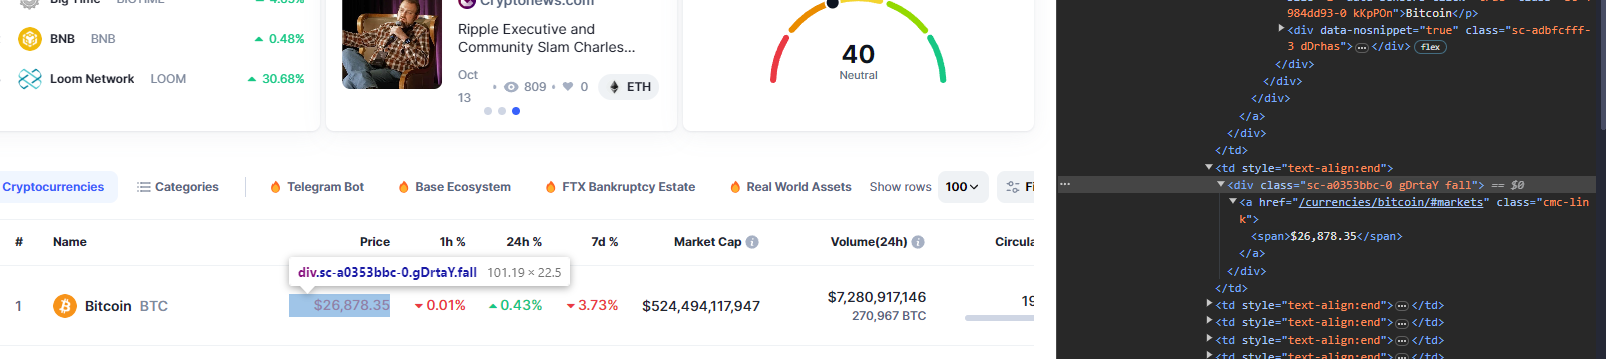

- Luego, la función busca etiquetas HTML que contienen información sobre la tendencia de precios de Bitcoin. Estas etiquetas se almacenan en una lista que creamos llamada lista.

- La función itera a través de la lista,  con bombre "lista" y verifica si la clase CSS de la etiqueta HTML indica una tendencia al alza o a la baja. La tendencia se almacena en la variable global tendencia como "alta" o "baja", dependiendo de la clase CSS encontrada en el primer elemento de lista.

En resumen, esta función raspa "scrape"  la página de "coinmarketcap.com" para obtener el precio actual y la tendencia de precios de Bitcoin y almacena esta información en las variables globales.

In [ ]:

def extraer_tendencias2():
 global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
 headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
 url = 'https://coinmarketcap.com'
 response = requests.get(url, headers=headers)
 response.raise_for_status() #se detiene en caso de error
 soup = BeautifulSoup(response.content, 'lxml')
 parrafoBtc = soup.find("p", string="Bitcoin")
 columnaBtc = parrafoBtc.find_parent("tr")
 columna_precio = columnaBtc.find_next_sibling()
 precio_actual2 = limpiar_precio(columna_precio.text)

 #Calculando la tendencia exclusivamente del Bitcoin
 lista = []
 respuesta = s.findAll('span', {'class':['sc-a0353bbc-0 gDrtaY', 'sc-a0353bbc-0 gDrtaY fall', 'sc-a0353bbc-0 gDrtaY rise']})
 for item2 in respuesta[::3]:
    lista.append(item2)

 tendenciaBeau = ''
 indice=0
 if lista[indice].find('span')['class'][0] == 'icon-Caret-down':
   tendenciaBeau = 'baja'
 else:
   tendenciaBeau = 'alta'

In [ ]:
print(precio_actual, tendencia)

30077.68 baja


sc-d55c02b-0 gUnzUB

## <font color='deepskyblue' style='font-size: 33px;'>  4 - Limpieza de Datos

▶ Creamos una copia del dataframe df_bitcoin para realizar la limpieza en este nuevo DataFrame (dfBitcoin_limpio), sin modificar el original:


1.   Datetime: Es el índice del dataframe, y contiene la fecha y hora del intervalo seleccionado, no puede estar duplicado.
2.   Open: Contiene el precio del Bitcoin al inicio del intervalo.
3.   High: Contiene el precio más alto del Bitcoin durante el intervalo.
4.   Low: Contiene el precio más bajo del Bitcoin durante el intervalo.
5.   Close: Contiene el precio del Bitcoin al final del intervalo.
6.   Volume: Contiene el total de transacciones hechas durante el intervalo.







En el dataframe dfBitcoin_limpio, se identifican duplicados y que haya solo un indeice unico sin datos replicados

Se analizaran valores nulos en la columna "Close" y se tratan.

Se verifica que todos los registros de la base tengan un Volume de transacción mayor a 0, si no, se eliminan.

Se identifican y eliminan los outliers en el precio del Bitcoin, columna Close, utilizando un gráfico de boxplot.

Se seleccionan únicamente los registros cuyo precio(Close) se encuentren entre el 1er cuartil (Q1) y el 3er cuartil (Q3) del boxplot.

Se calcula el precio promedio(Close) y se guarda en la variable Global media_bitcoin.

</font>

---

In [ ]:
# Precio promedio
original_media = round(df_bitcoin.Close.mean())
original_media

28447

In [ ]:
# Copia del dataframe original
dfBitcoin_limpio = df_bitcoin.copy()
dfBitcoin_limpio

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-10-15 00:00:00+00:00,26858.011719,26859.375000,26852.537109,26852.537109,0,0.0,0.0
2023-10-15 00:05:00+00:00,26846.734375,26849.812500,26846.007812,26849.812500,0,0.0,0.0
2023-10-15 00:10:00+00:00,26852.900391,26852.900391,26846.332031,26846.332031,0,0.0,0.0
2023-10-15 00:15:00+00:00,26846.289062,26849.716797,26846.289062,26849.716797,0,0.0,0.0
2023-10-15 00:20:00+00:00,26843.685547,26849.593750,26842.390625,26842.390625,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-21 19:10:00+00:00,30148.220703,30148.220703,30116.154297,30116.154297,32430080,0.0,0.0
2023-10-21 19:15:00+00:00,30100.392578,30119.751953,30093.759766,30105.693359,36553728,0.0,0.0
2023-10-21 19:20:00+00:00,30104.060547,30106.347656,30072.722656,30072.722656,8903680,0.0,0.0



- Con la Funcion duplicated identificaremos los valores duplicados
 https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

 ~




In [ ]:
# Eliminando repetidos
dfBitcoin_limpio = dfBitcoin_limpio[~dfBitcoin_limpio.index.duplicated()]

In [ ]:
# Eliminando Nulos en columna "Close"
dfBitcoin_limpio.dropna(subset = ['Close'], inplace=True)


- dfBitcoin_limpio:  
es el  DataFrame en el que deseaamos eliminar las filas con valores nulos.
- dropna:  
es el método que se aplica al DataFrame. (podemos usar tambien interpolate)
- subset=['Close'] :  
especifica la columna en la que deseas buscar valores nulos. - - En este caso, en la columna 'Close'.
- inplace=True:
indica que vamos a  modificar el DataFrame original en lugar de crear uno nuevo. Si inplace es True, las filas con valores nulos se eliminarán del DataFrame dfBitcoin_limpio, y el DataFrame se actualizará en su lugar.
- Si inplace es False (o no se especifica), se creará un nuevo DataFrame con las filas eliminadas, y el DataFrame original permanecerá sin cambios.

In [ ]:
dfBitcoin_limpio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1962 entries, 2023-10-15 00:00:00+00:00 to 2023-10-21 19:30:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1962 non-null   float64
 1   High          1962 non-null   float64
 2   Low           1962 non-null   float64
 3   Close         1962 non-null   float64
 4   Volume        1962 non-null   int64  
 5   Dividends     1962 non-null   float64
 6   Stock Splits  1962 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 122.6 KB


In [ ]:
# Filtrar operaciones de Volumen de transacción mayor a 0, caso contrario, se eliminan
seleccion = dfBitcoin_limpio['Volume'] > 0
dfBitcoin_limpio = dfBitcoin_limpio[seleccion]

In [ ]:
# Actualizar el Indice
dfBitcoin_limpio.reset_index(inplace=True)
dfBitcoin_limpio.head()

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-10-15 00:35:00+00:00,26839.109375,26839.109375,26823.027344,26823.027344,4668416,0.0,0.0
1,2023-10-15 00:40:00+00:00,26830.468750,26836.373047,26827.546875,26836.373047,1973760,0.0,0.0
2,2023-10-15 00:45:00+00:00,26841.347656,26841.347656,26837.048828,26837.048828,4313088,0.0,0.0
3,2023-10-15 01:00:00+00:00,26851.371094,26851.371094,26848.433594,26849.916016,512000,0.0,0.0
4,2023-10-15 01:10:00+00:00,26855.480469,26855.503906,26854.308594,26855.503906,1424896,0.0,0.0


In [ ]:
# Calculo de los quartiles Q1 y Q3
valor = dfBitcoin_limpio['Close']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)


In [ ]:
# Seleccionar solo los registros dentro de Q1 y Q3
seleccion = (valor >= Q1) & (valor <= Q3)
dfBitcoin_limpio = dfBitcoin_limpio[seleccion]

In [ ]:
# Calculo del promedio del dataFrame dfBitcoin_limpio
media_bitcoin = round(dfBitcoin_limpio.Close.mean(),0)


In [ ]:
print('El promedio de precios del Bitcoin en bruto es: ', original_media)
print('El promedio de precios del Bitcoin después de la limpieza es: ', media_bitcoin)

El promedio de precios del Bitcoin en bruto es:  28447
El promedio de precios del Bitcoin después de la limpieza es:  28399.0


## <font color='deepskyblue' style='font-size: 33px;'>  5 - Toma de Desiciones</font>

---

In [ ]:
def tomar_decisiones():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

  #Con condiciones comparo los valores del precio actual con la media y la tendencia.
  #Si el precio actual es mayor que la media y la tendencia sube, me recomienda vender.
  if(precio_actual > media_bitcoin) & (tendencia == "alta"):
      algoritmo_decision= "Vender"
  #Si el precio actual es menor que la media y la tendencia baja, me recomienda comprar.
  elif(precio_actual < media_bitcoin) & (tendencia == "baja"):
      algoritmo_decision= "Comprar"
  #Pero si en ninguno de los 2 casos, pasa algo entonces, me recomienda esperar.
  else:
      algoritmo_decision= "En espera"


## <font color='deepskyblue' style='font-size: 33px;'>  6 - Visualizacion</font>

---

In [ ]:
def visualizacion():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

    # Adiciona una nueva columna (Promedio) al dataframe original df_bitcoin
    # y almacena el valor de nuestra variable media_bitcoin.
    df_bitcoin['Promedio'] = media_bitcoin

    # Configura el tamaño del gráfico en una proporción de 16x5.
    plt.figure(figsize=(16,5))

    # Adiciona un título al gráfico.
    plt.title('Precio del Bitcoin y Media Móvil')

    # Usando el método plot() dibuja una línea en el gráfico,
    # con los datos del índice y la columna Close de la base df_bitcoin.
    plt.plot(df_bitcoin.index, df_bitcoin['Close'], label='Precio de Cierre')

    # Usando el método plot() dibuja una línea en el gráfico,
    # con los datos del índice y la columna Promedio de la base df_bitcoin.
    plt.plot(df_bitcoin.index, df_bitcoin['Promedio'], label='Media Móvil')

    # Usando el método annotate() muestra un mensaje dentro del gráfico
    # con la decisión calculada del algoritmo.
    plt.annotate(
        f'Decisión: {algoritmo_decision}',
        xy=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1]),
        xytext=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1] + 200),
        arrowprops=dict(facecolor='black', arrowstyle='->')
    )

    # Añadir leyenda
    plt.legend()
    # Finalmente, usando el método show() muestra en pantalla el gráfico que acabamos de configurar.
    plt.show()



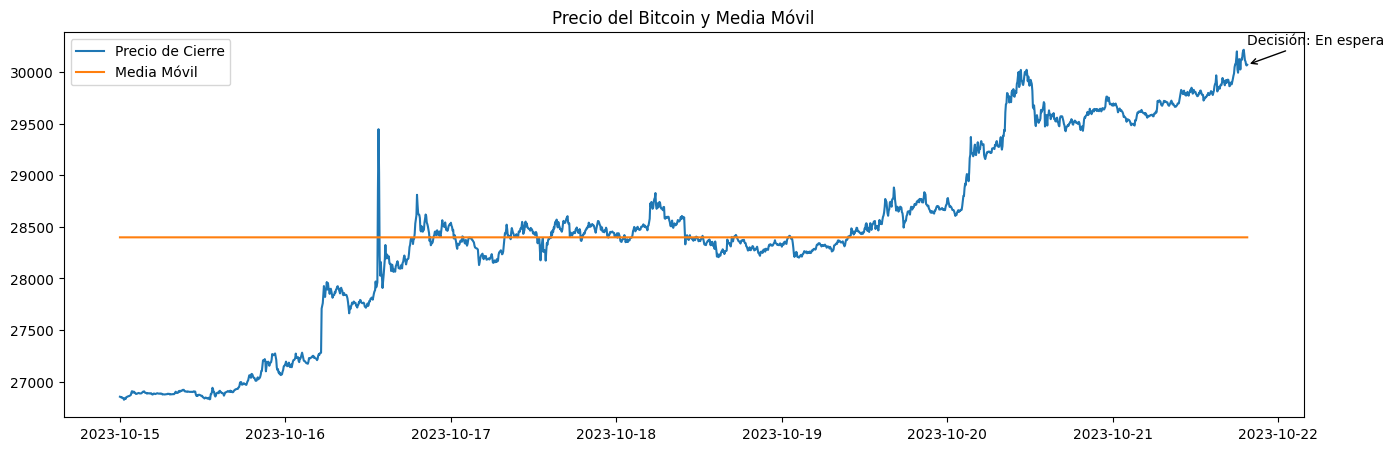

In [ ]:
#
tomar_decisiones()

#
visualizacion()

## <font color='deepskyblue' style='font-size: 33px;'>  6 - Automatizacion</font>

---

- Con el metodo 'clear_output()', nos permite borrar los resultados de la pantalla antes de imprimir un nuevo gráfico, y así evitar tener más de un gráfico en la pantalla, se importa de la siguiente forma: from IPython.display import clear_output.

- Se importo la biblioteca ‘time’ de la siguiente forma: import time, se utiliza el método time.sleep(300) para interrumpir la ejecución del código cada 300 segundos o 5 minutos.

- Por ultiumo se hace un loop, para ejecutar permanentemente y en intervalos de 5 minutos.

In [ ]:
while(True):
  importar_base_bitcoin()
  extraer_tendencias()
  tomar_decisiones()
  visualizacion()
  time.sleep(300)